In [7]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import copy 

import textwrap

import warnings
warnings.filterwarnings('ignore') # suppress sklearn deprecation warnings for now..
try:
    import graphviz
except ModuleNotFoundError as e:
    import pip
    pip.main(["install","graphviz"])
    import graphviz

from typing import Union

root_path = root_path = os.path.realpath('../../../..')
# print(root_path)
try:
    import causaltune
except ModuleNotFoundError:
    sys.path.append(os.path.join(root_path, "causaltune"))

from sklearn.model_selection import train_test_split
from causaltune import CausalTune
from causaltune.data_utils import CausalityDataset
from causaltune.datasets import generate_synthetic_data

# Import linear synthetic data creation
from causaltune.datasets import generate_linear_synthetic_data
from causaltune.datasets import load_dataset, save_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# set a few params
metrics = [
    "frobenius_norm",
    #"prob_erupt",
    #"policy_risk",
    #"codec",
    #"energy_distance", 
    "psw_energy_distance"
    ]

#iv_metrics = [
 #   "frobenius_norm",       
  #  "energy_distance",      
   # "codec",                
    #]

estimator_list = [
             "Dummy",
              "SparseLinearDML",
             "ForestDRLearner",
             "TransformedOutcome",
              "CausalForestDML",
              ".LinearDML",
             "DomainAdaptationLearner",
             "SLearner",
             "XLearner",
             "TLearner",
             "Ortho"        
             ] 

# iv_estimator_list = [
#                 'iv.econml.iv.dr.LinearDRIV', 
#                 'iv.econml.iv.dml.OrthoIV', 
#                 'iv.econml.iv.dml.DMLIV',
#                 'iv.econml.iv.dr.SparseLinearDRIV',
#                 'iv.econml.iv.dr.LinearIntentToTreatDRIV'
#                 ] 


n_samples = 10000
test_size = 0.33 # equal train,val,test
time_budget = 10000000000
#components_time_budget = 60
num_samples = 1000
n_runs = 1
out_dir = "frobenius_tests"
filename_out = ""

In [9]:
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# 1. Dataset Generation

In [10]:
# Create empty dictionary
data_sets = {}
np.random.seed(14)

In [11]:

# # Save the dataset
# save_dataset(cd_linear, "synthetic_data_test.pkl")

# # Load the dataset
# loaded_data = load_dataset("synthetic_data_test.pkl")

# # Now you can use the loaded_data just like the original synthetic_data
# loaded_data.data.head(5)

### 1.1 Non-linear Data
Unkown Confounders (RCT), Known Confoudners (Observational), IV

In [12]:
# cd = generate_synthetic_data(n_samples=n_samples, confounding=False, noisy_outcomes=True)
# cd.preprocess_dataset()
# data_sets['NonLinear_RCT'] = cd

# cd.data.head(5)
# save_dataset(cd, "RunDatasets/Large/NonLinear_RCT.pkl")

Dataset saved to RunDatasets/Large/NonLinear_RCT.pkl


In [13]:
# cd = generate_synthetic_data(n_samples=n_samples, confounding=True, noisy_outcomes=True)
# cd.preprocess_dataset()
# data_sets['NonLinear_KC'] = cd

# cd.data.head(5)
# save_dataset(cd, "RunDatasets/Large/NonLinear_KC.pkl")

Dataset saved to RunDatasets/Large/NonLinear_KC.pkl


In [14]:
# cd = generate_synthetic_data(n_samples=n_samples, confounding=True, known_propensity=True)
# cd.preprocess_dataset()
# data_sets['NonLinear_KCKP'] = cd

# cd.data.head(5)
# save_dataset(cd, "RunDatasets/Large/NonLinear_KCKP.pkl")

Dataset saved to RunDatasets/Large/NonLinear_KCKP.pkl


In [15]:
# cd = generate_synthetic_data(n_samples=n_samples, confounding=True, add_instrument=True)
# cd.preprocess_dataset()
# data_sets['NonLinear_IV'] = cd

# cd.data.head(5)
# save_dataset(cd, "RunDatasets/Large/NonLinear_IV.pkl")

Dataset saved to RunDatasets/Large/NonLinear_IV.pkl


### 1.2 Linear Data
Unkown Confounders (RCT), Known Confoudners (Observational), IV

In [16]:
# cd = generate_linear_synthetic_data(n_samples=n_samples, confounding=False, noisy_outcomes=True)
# cd.preprocess_dataset()
# data_sets['Linear_RCT'] = cd

# cd.data.head(5)
# save_dataset(cd, "RunDatasets/Large/Linear_RCT.pkl")

Dataset saved to RunDatasets/Large/Linear_RCT.pkl


In [17]:
# cd = generate_linear_synthetic_data(n_samples=n_samples, confounding=True, noisy_outcomes=True)
# cd.preprocess_dataset()
# data_sets['Linear_KC'] = cd

# cd.data.head(5)
# save_dataset(cd, "RunDatasets/Large/Linear_KC.pkl")

Dataset saved to RunDatasets/Large/Linear_KC.pkl


In [18]:
# cd = generate_linear_synthetic_data(n_samples=n_samples, confounding=True, known_propensity=True)
# cd.preprocess_dataset()
# data_sets['Linear_KCKP'] = cd

# cd.data.head(5)
# save_dataset(cd, "RunDatasets/Large/Linear_KCKP.pkl")

Dataset saved to RunDatasets/Large/Linear_KCKP.pkl


In [19]:
# cd = generate_linear_synthetic_data(n_samples=n_samples, confounding=True, add_instrument=True)
# cd.preprocess_dataset()
# data_sets['Linear_IV'] = cd

# cd.data.head(5)
# save_dataset(cd, "RunDatasets/Large/Linear_IV.pkl")

Dataset saved to RunDatasets/Large/Linear_IV.pkl


### Data Loading

In [20]:
# Initialize an empty dictionary to store the loaded datasets
data_sets = {}

# List of dataset names and file paths
dataset_names = ['NonLinear_RCT', 'NonLinear_KC', 'NonLinear_KCKP', 'NonLinear_IV', 
                 'Linear_RCT', 'Linear_KC', 'Linear_KCKP', 'Linear_IV']
file_paths = [f"RunDatasets/Large/{name}.pkl" for name in dataset_names]

# Loop through dataset names and file paths to load each dataset
for name, file_path in zip(dataset_names, file_paths):
    data_sets[name] = load_dataset(file_path)

# Optionally, print the keys of the dictionary to verify successful loading
print(f"Loaded datasets: {list(data_sets.keys())}")

Dataset loaded from RunDatasets/Large/NonLinear_RCT.pkl
Dataset loaded from RunDatasets/Large/NonLinear_KC.pkl
Dataset loaded from RunDatasets/Large/NonLinear_KCKP.pkl
Dataset loaded from RunDatasets/Large/NonLinear_IV.pkl
Dataset loaded from RunDatasets/Large/Linear_RCT.pkl
Dataset loaded from RunDatasets/Large/Linear_KC.pkl
Dataset loaded from RunDatasets/Large/Linear_KCKP.pkl
Dataset loaded from RunDatasets/Large/Linear_IV.pkl
Loaded datasets: ['NonLinear_RCT', 'NonLinear_KC', 'NonLinear_KCKP', 'NonLinear_IV', 'Linear_RCT', 'Linear_KC', 'Linear_KCKP', 'Linear_IV']


# 2. Model Fitting

In [ ]:
for dataset_name, cd in data_sets.items():
    
    for i_run in range(1,n_runs+1):
        
        cd_i = copy.deepcopy(cd)
        train_df, test_df = train_test_split(cd_i.data, test_size=test_size)
        test_df = test_df.reset_index(drop=True)
        cd_i.data = train_df
        
        #for metric in metrics:
        for metric in metrics:
            ct = CausalTune(
                metric=metric,
                metrics_to_report=[metric],
                verbose=1,
                components_verbose=1,
                #components_time_budget=components_time_budget,
                time_budget=time_budget,
                estimator_list=estimator_list,
                num_samples=num_samples,
                store_all_estimators=True,
                outcome_model="auto",
            )
            
            ct.fit(
                data=cd_i,
                treatment="treatment",
                outcome="outcome",
            )

            
            # compute relevant scores (skip newdummy)
            datasets = {"train": ct.train_df, "validation": ct.test_df, "test": test_df}
            # get scores on train,val,test for each trial, 
            # sort trials by validation set performance
            # assign trials to estimators
            estimator_scores = {est: [] for est in ct.scores.keys() if "NewDummy" not in est}
            for trial in ct.results.trials:
                # estimator name:
                estimator_name = trial.last_result["estimator_name"]
                if  trial.last_result["estimator"]:
                    estimator = trial.last_result["estimator"]
                    scores = {}
                    for ds_name, df in datasets.items():
                        scores[ds_name] = {}
                        # make scores
                        est_scores = ct.scorer.make_scores(
                            estimator,
                            df,
                            metrics_to_report=ct.metrics_to_report,
                        )

                        # add cate:
                        scores[ds_name]["CATE_estimate"] = estimator.estimator.effect(df)
                        # add ground truth for convenience
                        scores[ds_name]["CATE_groundtruth"] = df["true_effect"]
                        scores[ds_name][metric] = est_scores[metric]
##################################
                    scores['optimization_score'] = trial.last_result.get('optimization_score')

                    estimator_scores[estimator_name].append(scores)


            # sort trials by validation performance
            for k in estimator_scores.keys():
                estimator_scores[k] = sorted(
                    estimator_scores[k],
                    key=lambda x: x["validation"][metric],
                    reverse=False if metric in ["energy_distance", "psw_energy_distance", "codec", "frobenius_norm", "policy_risk"] else True,
                )
            results = {
                "best_estimator": ct.best_estimator,
                "best_config": ct.best_config,
                "best_score": ct.best_score,
                "optimised_metric": metric,
                "scores_per_estimator": estimator_scores,
            }


            with open(f"{out_dir}{filename_out}_{metric}_run_{i_run}_{dataset_name}.pkl", "wb") as f:
                pickle.dump(results, f)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for est, scores in estimator_scores.items():
    plt.plot(range(len(scores)), [score['optimization_score'] for score in scores], label=est)
plt.xlabel('Trial')
plt.ylabel('Optimization Score')
plt.legend()
plt.title('Optimization Scores Across Trials')
plt.show()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import colorsys
import textwrap
import matplotlib

out_dir = 'ConvergencePlotting'

# Define list of trials and metrics

metrics = ["frobenius_norm", "prob_erupt", "codec", "policy_risk", "energy_distance", "psw_energy_distance"]
#metrics = ["frobenius_norm", "psw_energy_distance"]
#metrics = ["frobenius_norm", "prob_erupt", "policy_risk", "energy_distance", "psw_energy_distance"]
metrics = ["frobenius_norm", "prob_erupt", "energy_distance", "psw_energy_distance"]


# RCT
#trials = ['Linear_RCT']
#trials = ['NonLinear_RCT']

# KC
trials = ['Linear_KC'] 
#trials = ['NonLinear_KC']

# KCKP
#trials = ['Linear_KCKP'] 
#trials = ['NonLinear_KCKP']

# IV
#trials = ['Linear_IV'] 
#trials = ['NonLinear_IV']

#out_dir = trials[0]


#metrics = ["frobenius_norm", "codec", "energy_distance"]


### Define names for metrics and subplots to be displayed

# IV
# metric_names = ['Frobenius Norm', 'Energy Distance', 'CODEC']
# subplot_labels = ['(a)', '(b)', '(c)']

# RCT / KC
metric_names = ['Frobenius Norm', 'Probabilistic Erupt', 'CODEC','Policy Risk', 'Energy Distance','Propensity Weighted Energy Distance']
#metric_names = ['Frobenius Norm', 'Probabilistic Erupt','Policy Risk', 'Energy Distance','Propensity Weighted Energy Distance']
metric_names = ['Frobenius Norm', 'Probabilistic Erupt', 'Energy Distance','Propensity Weighted Energy Distance']


subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
#subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)']
subplot_labels = ['(a)', '(b)', '(c)', '(d)']


# Coloring
colors = ([matplotlib.colors.CSS4_COLORS['black']] +
          list(matplotlib.colors.TABLEAU_COLORS) + [
              matplotlib.colors.CSS4_COLORS['lime'],
              matplotlib.colors.CSS4_COLORS['yellow'],
              matplotlib.colors.CSS4_COLORS['pink']
          ])

def scale_lightness(rgb, scale_l):
    # Convert RGB to HLS and adjust lightness
    h, l, s = colorsys.rgb_to_hls(*rgb)
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s)


### Plot formatting

# Set columns
no_col = min(3, len(metrics))

# Dynamically set number of rows for subplots
if trials[0].startswith('iv') or len(metrics) < 4:
    no_rows = 1
else:
    no_rows = 2

fontsize = 9

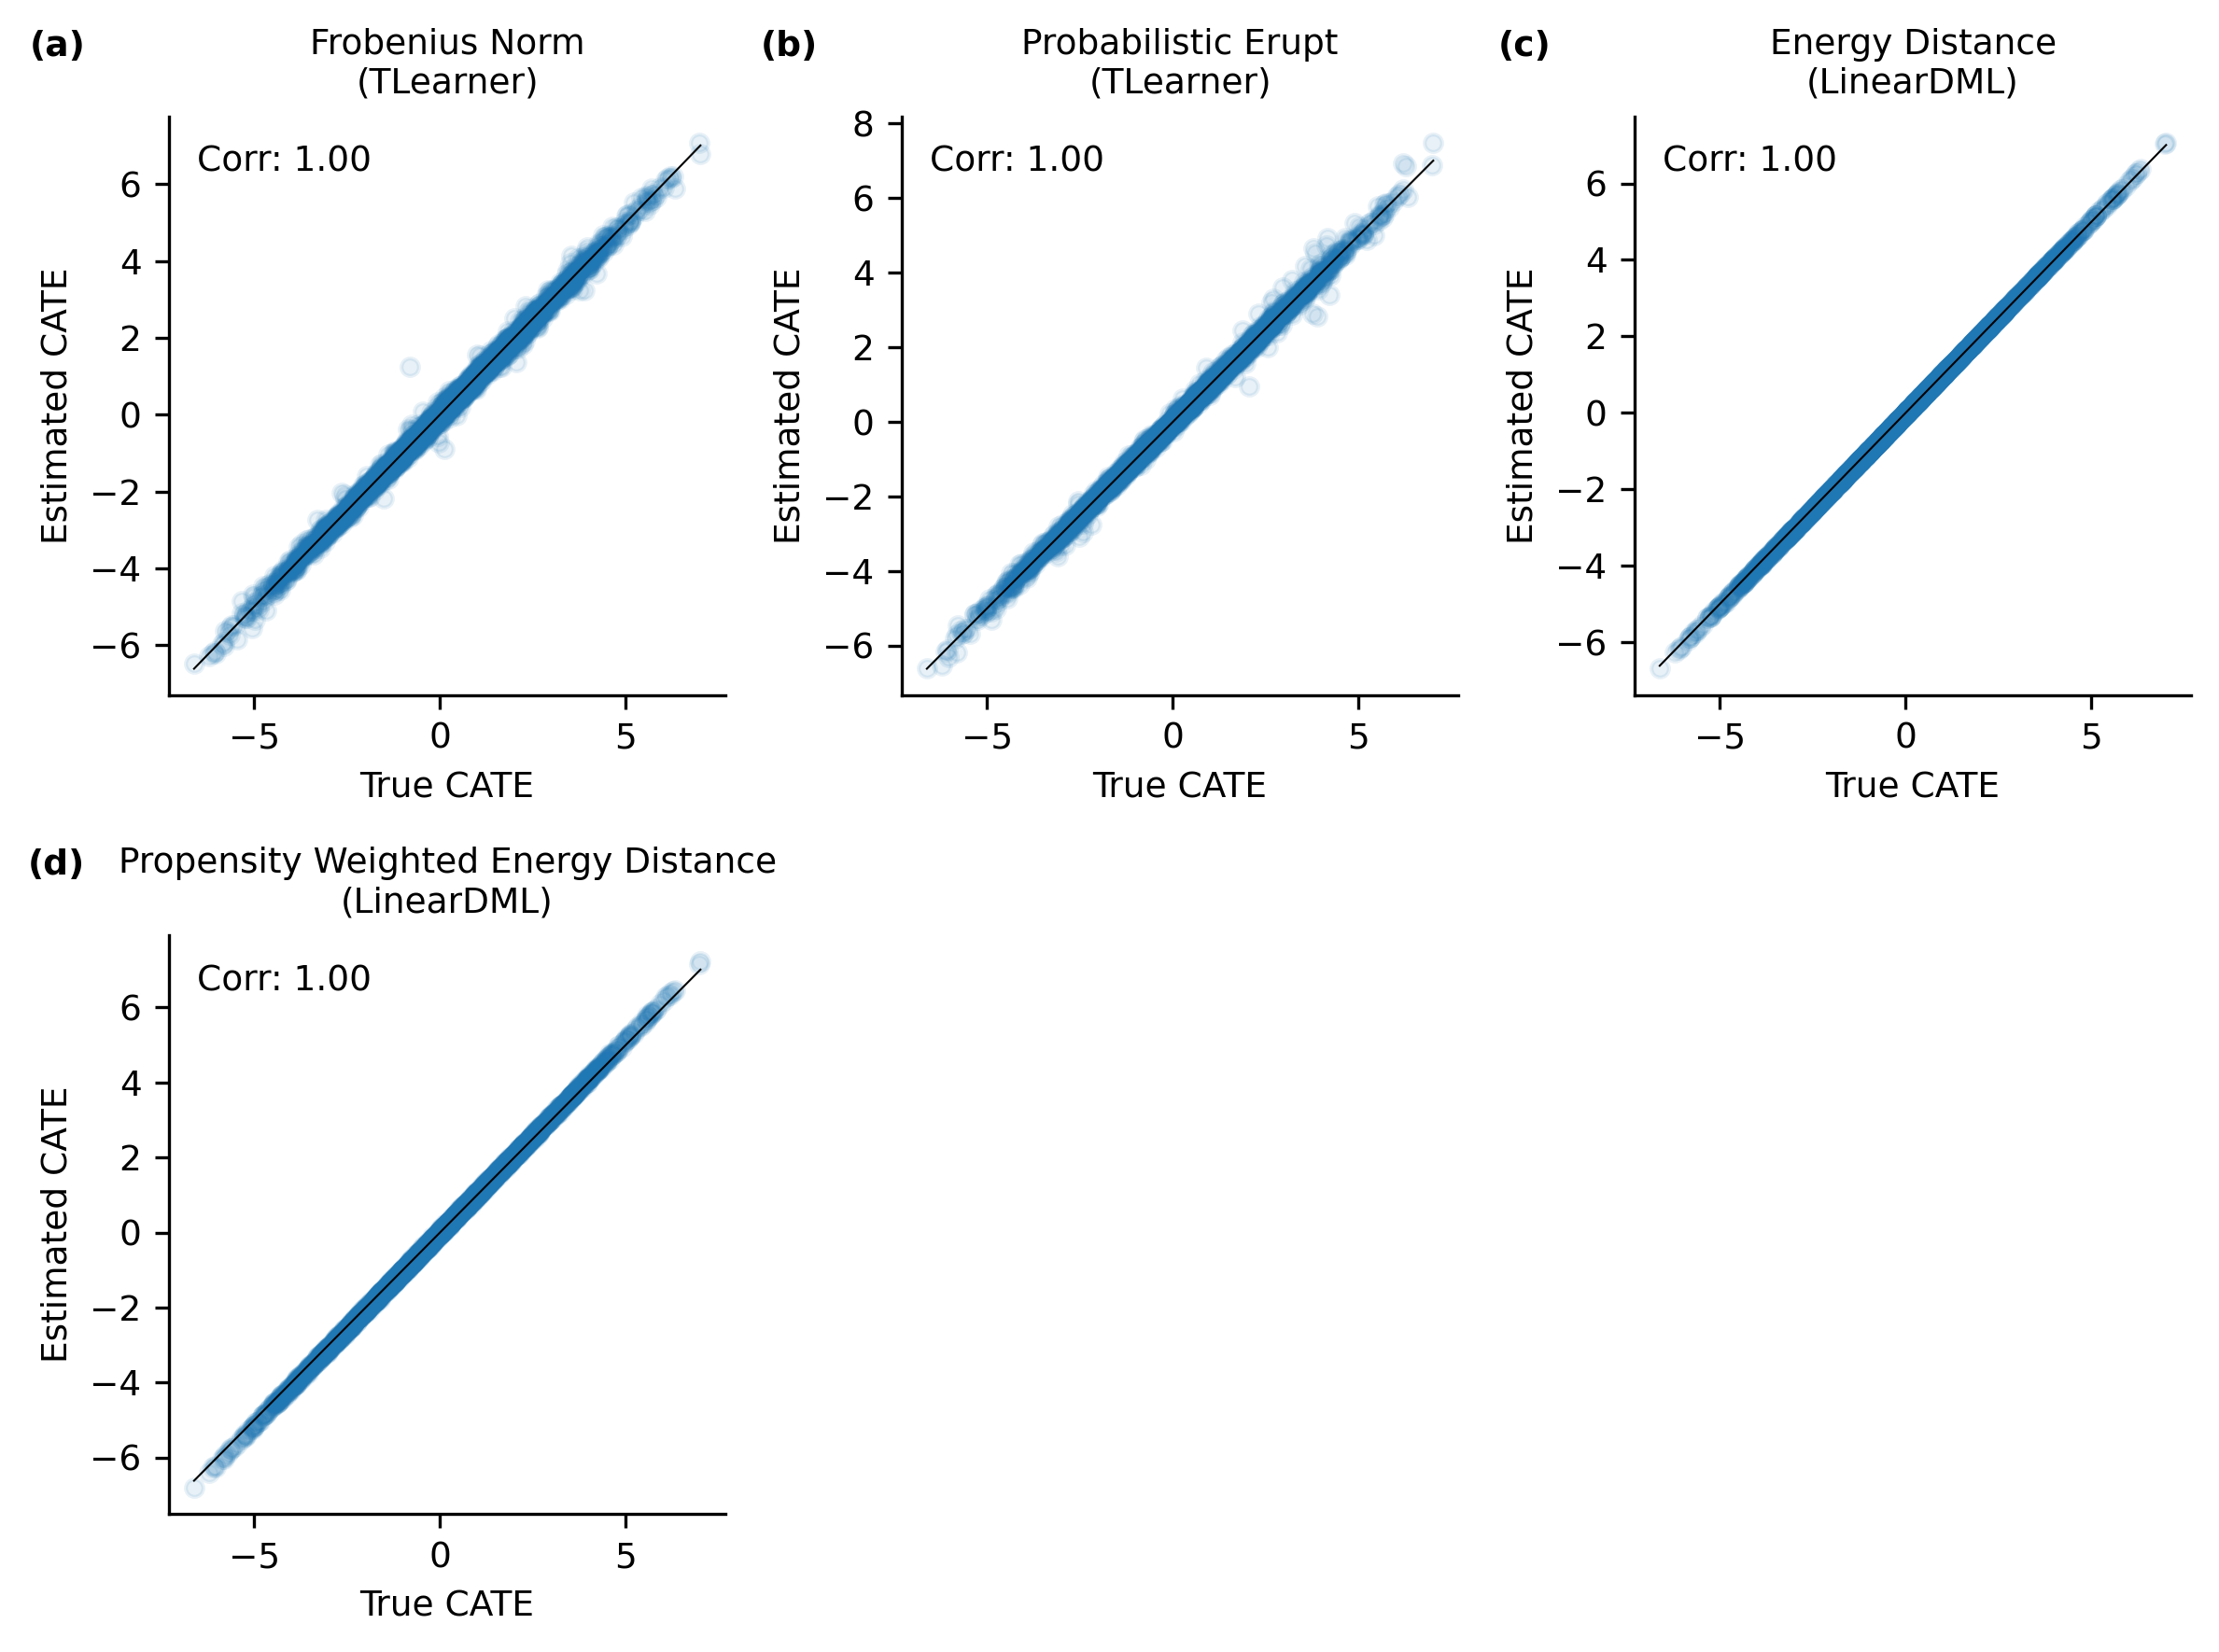

In [5]:
%matplotlib inline

fig, axs = plt.subplots(no_rows, no_col, figsize=(8, 3*no_rows), dpi=300)

# Ensure axs is a flat list even if there's only one row or column
if isinstance(axs, np.ndarray):
    axs = axs.flatten()
else:
    axs = [axs]  # In case there's only one subplot, wrap it in a list

# Plot true against estimated for best estimator
for i, (trial, metric) in enumerate([(t, m) for t in trials for m in metrics]):
    ax = axs[i]
    
    filename = f"{metric}_run_1_{trial}.pkl"

    with open(f"{out_dir}/_{filename}", "rb") as f:
        results = pickle.load(f)

    # filename = f"{filename_out}_{metric}_run_1_{trial}.pkl"

    # with open(f"{out_dir}/{filename}", "rb") as f:
    #     results = pickle.load(f)
    
    best_estimator = results["best_estimator"]

    CATE_gt = results["scores_per_estimator"][best_estimator][0]["test"]["CATE_groundtruth"]
    #print(results["scores_per_estimator"][best_estimator])
    CATE_est = results["scores_per_estimator"][best_estimator][0]["test"]["CATE_estimate"]
    
    # Plot
    ax.scatter(CATE_gt, CATE_est, s=20, alpha=0.1)
    ax.plot([min(CATE_gt), max(CATE_gt)], [min(CATE_gt), max(CATE_gt)], "k-", linewidth=0.5)
    
    ax.set_xlabel("True CATE", fontsize=fontsize)
    ax.set_ylabel("Estimated CATE", fontsize=fontsize)
    
    ax.set_title(f"{metric_names[i]}\n({best_estimator.split('.')[-1]})", fontsize=fontsize)

    # Change the fontsize of the x and y ticks
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    # Remove top and right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Add correlation coefficient
    cate_gt_for_cor = list(CATE_gt)
    try:
        cate_est_for_cor = CATE_est[:, 0]
    except:
        cate_est_for_cor = CATE_est

    corr = np.corrcoef(cate_gt_for_cor, cate_est_for_cor)[0, 1]

    ax.text(0.05, 0.95, f'Corr: {corr:.2f}', transform=ax.transAxes, 
            verticalalignment='top', fontsize=fontsize)

    # Add subplot label
    ax.text(-0.15, 1.15, subplot_labels[i], transform=ax.transAxes,
            fontsize=fontsize, fontweight='bold', va='top', ha='right')

# If there are extra axes (more subplots than metrics), remove the unused ones
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
#plt.savefig(f"{out_dir}/frob_rct_linear.pdf", format="pdf")
plt.show()

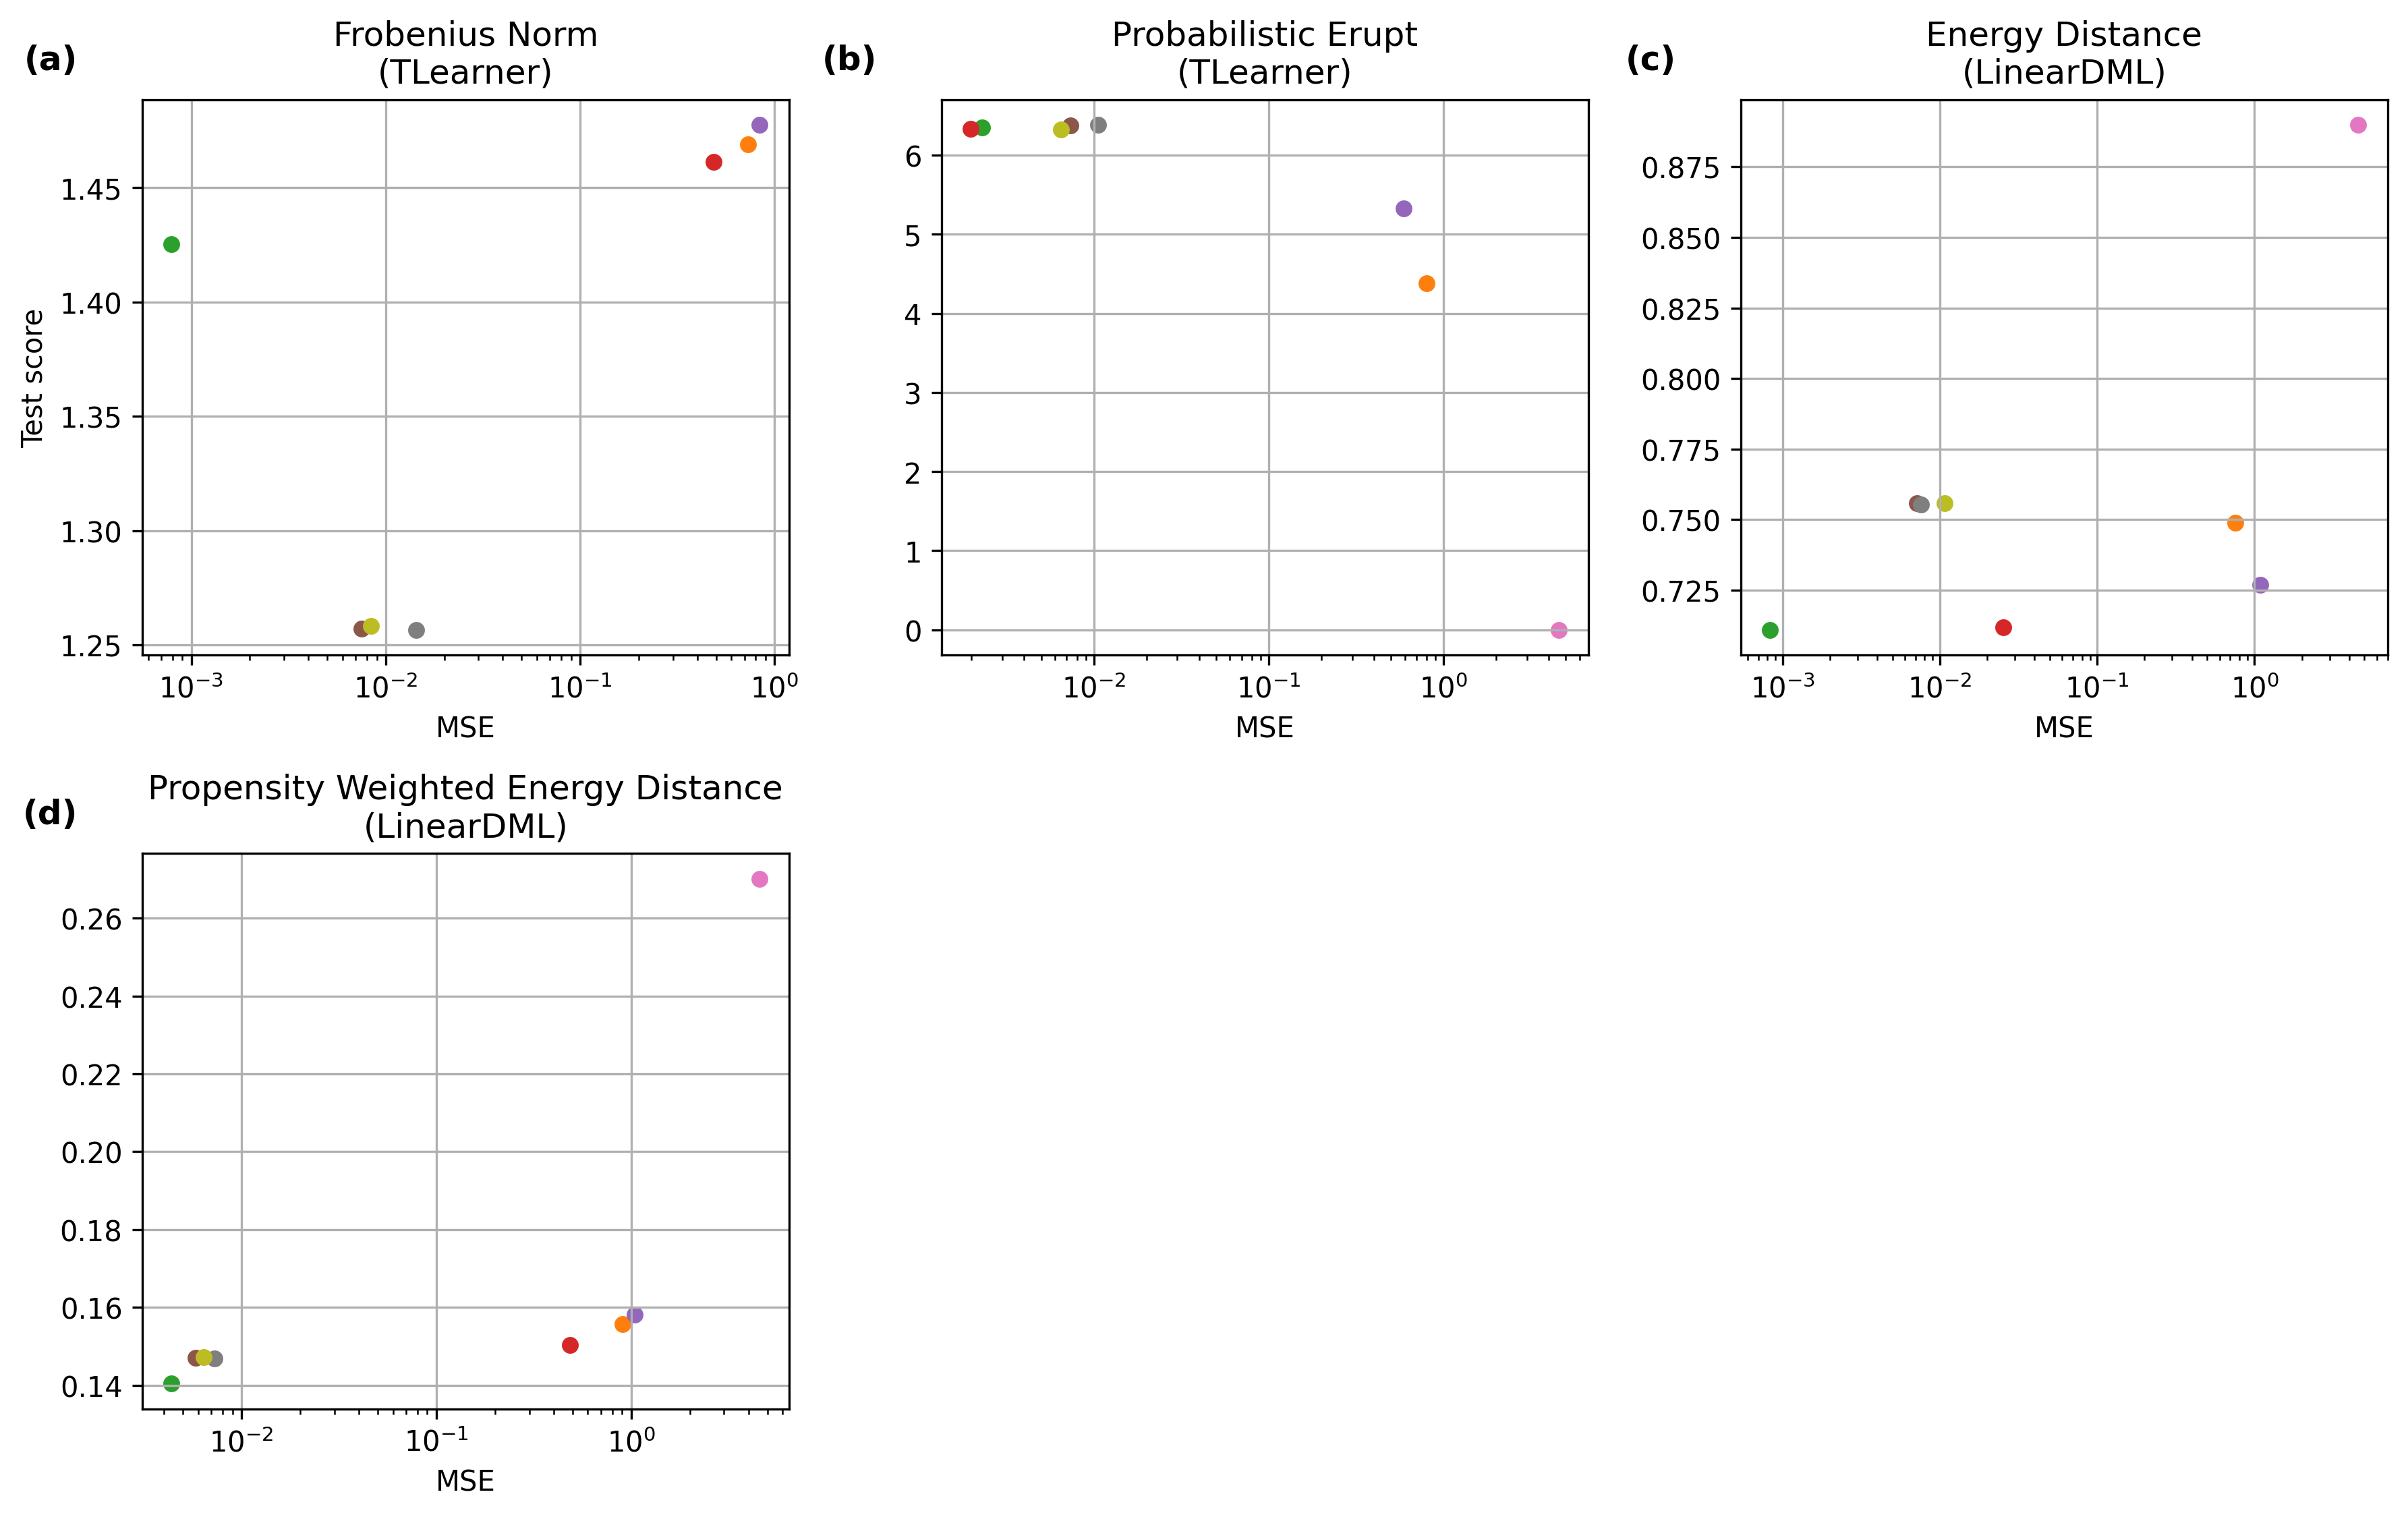

In [6]:
%matplotlib inline

fig, axs = plt.subplots(no_rows, no_col, figsize=(no_col * 4, no_rows * 4), dpi=300)

# Ensure axs is always a list (whether it's a 1D or 2D array)
if isinstance(axs, np.ndarray):
    axs = axs.flatten()
else:
    axs = [axs]

all_handles = []
all_labels = []

for row, trial in enumerate(trials):
    for col, metric in enumerate(metrics):
        ax = axs[col]

        filename = f"{metric}_run_1_{trial}.pkl"
    
        with open(f"{out_dir}/_{filename}", "rb") as f:
            results = pickle.load(f)
        
        #filename = f"{filename_out}_{metric}_run_1_{trial}.pkl"
        #with open(f"{out_dir}/{filename}", "rb") as f:
         #   results = pickle.load(f)
        
        for idx, (est_name, scr) in enumerate(results["scores_per_estimator"].items()):
            if "Dummy" not in est_name and len(scr):
                # Plot intermediate runs
                if len(scr) > 1:
                    lightness = np.linspace(1, 2.8, len(scr))
                    col_rgb = matplotlib.colors.ColorConverter.to_rgb(colors[idx])
                    for i_run in range(1, len(scr)):
                        CATE_gt = scr[i_run]["test"]["CATE_groundtruth"]
                        CATE_est = scr[i_run]["test"]["CATE_estimate"]
                        CATE_gt = np.array(CATE_gt).flatten()
                        CATE_est = np.array(CATE_est).flatten()
                        mse = np.mean((CATE_gt - CATE_est)**2)
                        score = scr[i_run]["test"][metric]  # Adjust metric access
                        ax.scatter(mse, score, color=scale_lightness(col_rgb, lightness[i_run-1]), 
                                   s=30, linewidths=0.5, label="nolegend")

                # Plot best estimator
                CATE_gt = scr[0]["test"]["CATE_groundtruth"]
                CATE_est = scr[0]["test"]["CATE_estimate"]
                CATE_gt = np.array(CATE_gt).flatten()
                CATE_est = np.array(CATE_est).flatten()
                mse = np.mean((CATE_gt - CATE_est)**2)
                score = scr[0]["test"][metric]  # Adjust metric access
                scatter = ax.scatter(mse, score, color=colors[idx], s=30, linewidths=0.5)
                
                # Collect handles and labels for the overarching legend
                handle = scatter
                label = est_name.split(".")[-1]
                if label not in all_labels:
                    all_handles.append(handle)
                    all_labels.append(label)

        # Add bold subplot labels
        ax.text(-0.1, 1.1, subplot_labels[col], transform=ax.transAxes,
                fontsize=12, fontweight='bold', va='top', ha='right')
        
        if col == 0:
            ax.set_ylabel("Test score")
        ax.set_xlabel("MSE")
        best_estimator = results["best_estimator"]
        ax.set_title(f"{metric_names[col]}\n({best_estimator.split('.')[-1]})")
        ax.set_xscale("log")
        ax.grid(True)

# Remove unused subplots if there are any
for j in range(len(metrics), len(axs)):
    fig.delaxes(axs[j])

# Add legend in the last (empty) subplot, if applicable
if len(all_handles) > 0 and len(all_labels) > 0:  # Ensure valid handles and labels
    last_ax_index = len(axs) - 1  # Get the last subplot index
    if not ax.has_data():  # Ensure the last subplot is free
        axs[last_ax_index].legend(all_handles, all_labels, loc='center', frameon=False)
        axs[last_ax_index].axis('off')  # Hide the axis of the legend subplot

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"{out_dir}/frob_test_ranking_rct_linear.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [7]:
for element in results["scores_per_estimator"]['backdoor.causaltune.models.Dummy']:
    print([element]==results["scores_per_estimator"]['backdoor.causaltune.models.Dummy'])
    print("*****************************************************")

#print((results["scores_per_estimator"]['backdoor.causaltune.models.Dummy']))
print(results.keys())

True
*****************************************************
dict_keys(['best_estimator', 'best_config', 'best_score', 'optimised_metric', 'scores_per_estimator'])


In [10]:
import pickle
from pprint import pprint

def explore_results(results):
    summary = {
        'keys': list(results.keys()),
        'best_estimator': results.get('best_estimator', 'N/A'),
        'best_score': results.get('best_score', 'N/A'),
        'optimised_metric': results.get('optimised_metric', 'N/A'),
    }
    
    if 'scores_per_estimator' in results:
        summary['estimators'] = list(results['scores_per_estimator'].keys())
        
        # Sample the first estimator
        first_estimator = next(iter(results['scores_per_estimator']))
        estimator_data = results['scores_per_estimator'][first_estimator]
        
        if isinstance(estimator_data, list):
            summary['estimator_data_type'] = 'list'
            if estimator_data:
                summary['sample_estimator_data'] = estimator_data[0]
        elif isinstance(estimator_data, dict):
            summary['estimator_data_type'] = 'dict'
            summary['estimator_keys'] = list(estimator_data.keys())
            if 'trials' in estimator_data and estimator_data['trials']:
                summary['sample_trial'] = estimator_data['trials'][0]
    
    return summary

# Explore the results
summary = explore_results(results)

# Print the summary
print("Results Structure Summary:")
pprint(summary, depth=3)

# If we have a sample trial, let's explore its structure
if 'sample_trial' in summary:
    print("\nSample Trial Structure:")
    pprint(summary['sample_trial'], depth=2)
elif 'sample_estimator_data' in summary:
    print("\nSample Estimator Data Structure:")
    pprint(summary['sample_estimator_data'], depth=2)

Results Structure Summary:
{'best_estimator': 'backdoor.econml.dml.LinearDML',
 'best_score': 0.12593505299989705,
 'estimator_data_type': 'list',
 'estimators': ['backdoor.causaltune.models.Dummy',
                'backdoor.causaltune.models.NaiveDummy',
                'backdoor.econml.dml.CausalForestDML',
                'backdoor.econml.dml.LinearDML',
                'backdoor.econml.dml.SparseLinearDML',
                'backdoor.econml.dr.ForestDRLearner',
                'backdoor.econml.metalearners.DomainAdaptationLearner',
                'backdoor.econml.metalearners.SLearner',
                'backdoor.econml.metalearners.TLearner',
                'backdoor.econml.metalearners.XLearner'],
 'keys': ['best_estimator',
          'best_config',
          'best_score',
          'optimised_metric',
          'scores_per_estimator'],
 'optimised_metric': 'psw_energy_distance',
 'sample_estimator_data': {'optimization_score': None,
                           'test': {'CATE_esti

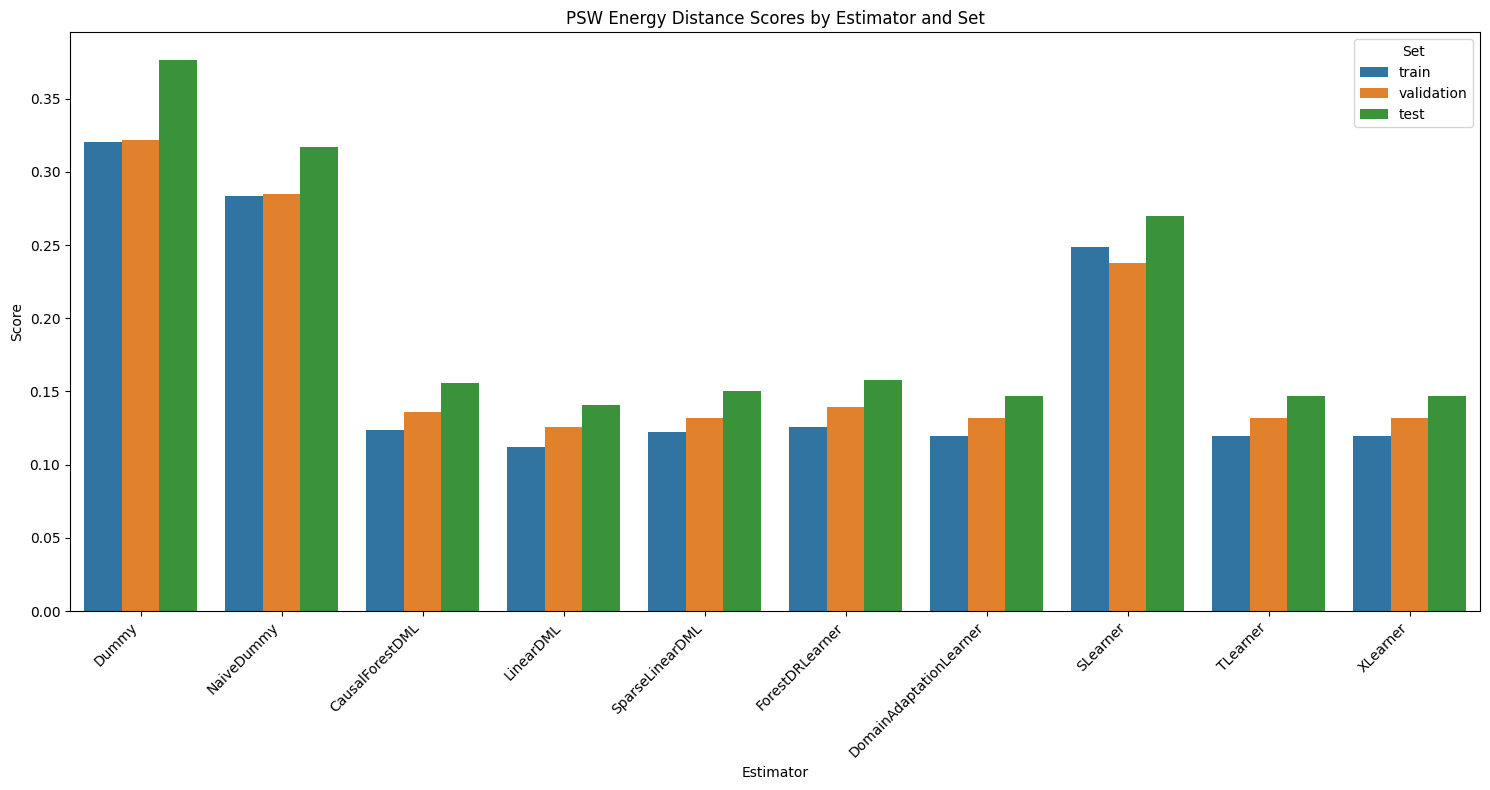


Summary statistics:
                                    count      mean  std       min       25%  \
Estimator               Set                                                    
CausalForestDML         test          1.0  0.155652  NaN  0.155652  0.155652   
                        train         1.0  0.123746  NaN  0.123746  0.123746   
                        validation    1.0  0.135801  NaN  0.135801  0.135801   
DomainAdaptationLearner test          1.0  0.147075  NaN  0.147075  0.147075   
                        train         1.0  0.119623  NaN  0.119623  0.119623   
                        validation    1.0  0.132008  NaN  0.132008  0.132008   
Dummy                   test          1.0  0.376525  NaN  0.376525  0.376525   
                        train         1.0  0.320247  NaN  0.320247  0.320247   
                        validation    1.0  0.321602  NaN  0.321602  0.321602   
ForestDRLearner         test          1.0  0.158084  NaN  0.158084  0.158084   
                   

In [13]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def extract_scores(results):
    scores_data = []
    for estimator, trials in results['scores_per_estimator'].items():
        for trial in trials:  # There's only one trial, but we'll keep the loop for consistency
            for set_type in ['train', 'validation', 'test']:
                if set_type in trial and 'psw_energy_distance' in trial[set_type]:
                    scores_data.append({
                        'Estimator': estimator.split('.')[-1],  # Use only the last part of the estimator name
                        'Set': set_type,
                        'Score': trial[set_type]['psw_energy_distance']
                    })
    return pd.DataFrame(scores_data)

def plot_scores(df):
    plt.figure(figsize=(15, 8))
    sns.barplot(x='Estimator', y='Score', hue='Set', data=df)
    plt.title('PSW Energy Distance Scores by Estimator and Set')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



# Extract scores
df_scores = extract_scores(results)

# Plot scores
plot_scores(df_scores)

# Print summary statistics
print("\nSummary statistics:")
print(df_scores.groupby(['Estimator', 'Set'])['Score'].describe())

In [8]:
print(results["best_estimator"])
print(results["best_score"])
print(results["scores_per_estimator"])

backdoor.econml.dml.LinearDML
0.12593505299989705
{'backdoor.causaltune.models.Dummy': [{'train': {'CATE_estimate': array([[-1.0111549 ],
       [-1.01124238],
       [-1.01123999],
       ...,
       [-1.01119836],
       [-1.01121068],
       [-1.01105936]]), 'CATE_groundtruth': 6592   -0.414910
9757    1.365640
4080   -1.409442
6176   -1.608933
2936   -0.228856
          ...   
6410   -1.068916
8470    1.289496
215    -2.155878
1287   -1.307278
692     2.619003
Name: true_effect, Length: 5360, dtype: float64, 'psw_energy_distance': 0.32024719767646115}, 'validation': {'CATE_estimate': array([[-0.95119785],
       [-0.95119908],
       [-0.95119205],
       ...,
       [-0.95113677],
       [-0.95131038],
       [-0.95134552]]), 'CATE_groundtruth': 2258    2.231769
3761   -0.848819
8503    0.756598
7266   -2.099975
6954    4.254023
          ...   
2122    1.226812
2195   -0.966173
9002    1.186607
7405   -2.196978
7325   -0.837106
Name: true_effect, Length: 1340, dtype: float64, 'ps

In [ ]:
print(results)#['backdoor.causaltune.models.TransformedOutcome'][0]['validation'])

In [ ]:
%matplotlib inline

fig, axs = plt.subplots(no_rows, no_col, figsize=(no_col * 4, no_rows * 4), dpi=300)

# Ensure axs is always a list (whether it's a 1D or 2D array)
if isinstance(axs, np.ndarray):
    axs = axs.flatten()
else:
    axs = [axs]

all_handles = []
all_labels = []

for row, trial in enumerate(trials):
    for col, metric in enumerate(metrics):
        ax = axs[col]
          
        filename = f"{filename_out}_{metric}_run_1_{trial}.pkl"
        with open(f"{out_dir}/{filename}", "rb") as f:
            results = pickle.load(f)
        
        for idx, (est_name, scr) in enumerate(results["scores_per_estimator"].items()):
            if "Dummy" not in est_name and len(scr):
                # Plot intermediate runs
                if len(scr) > 1:
                    lightness = np.linspace(1, 2.8, len(scr))
                    col_rgb = matplotlib.colors.ColorConverter.to_rgb(colors[idx])
                    for i_run in range(1, len(scr)):
                        CATE_gt = scr[i_run]["test"]["CATE_groundtruth"]
                        CATE_est = scr[i_run]["test"]["CATE_estimate"]
                        CATE_gt = np.array(CATE_gt).flatten()
                        CATE_est = np.array(CATE_est).flatten()
                        mse = np.mean((CATE_gt - CATE_est)**2)
                        score = scr[i_run]["test"][metric]  # Adjust metric access
                        ax.scatter(mse, score, color=scale_lightness(col_rgb, lightness[i_run-1]), 
                                   s=30, linewidths=0.5, label="nolegend")

                # Plot best estimator
                CATE_gt = scr[0]["test"]["CATE_groundtruth"]
                CATE_est = scr[0]["test"]["CATE_estimate"]
                CATE_gt = np.array(CATE_gt).flatten()
                CATE_est = np.array(CATE_est).flatten()
                mse = np.mean((CATE_gt - CATE_est)**2)
                score = scr[0]["test"][metric]  # Adjust metric access
                scatter = ax.scatter(mse, score, color=colors[idx], s=30, linewidths=0.5)
                
                # Collect handles and labels for the overarching legend
                handle = scatter
                label = est_name.split(".")[-1]
                if label not in all_labels:
                    all_handles.append(handle)
                    all_labels.append(label)

        # Add bold subplot labels
        ax.text(-0.1, 1.1, subplot_labels[col], transform=ax.transAxes,
                fontsize=12, fontweight='bold', va='top', ha='right')
        
        if col == 0:
            ax.set_ylabel("Test score")
        ax.set_xlabel("MSE")
        best_estimator = results["best_estimator"]
        ax.set_title(f"{metric_names[col]}\n({best_estimator.split('.')[-1]})")
        ax.set_xscale("log")
        ax.grid(True)

# Remove unused subplots if there are any
for j in range(len(metrics), len(axs)):
    fig.delaxes(axs[j])

# Add legend in the last (empty) subplot, if applicable
if len(all_handles) > 0 and len(all_labels) > 0:  # Ensure valid handles and labels
    last_ax_index = len(axs) - 1  # Get the last subplot index
    if not ax.has_data():  # Ensure the last subplot is free
        axs[last_ax_index].legend(all_handles, all_labels, loc='center', frameon=False)
        axs[last_ax_index].axis('off')  # Hide the axis of the legend subplot

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"{out_dir}/frob_test_ranking_rct_linear.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
import numpy as np
import pandas as pd
from dowhy.causal_estimator import CausalEstimate
from causaltune.utils import psw_joint_weights

def frobenius_norm_score(
    self,
    estimate: CausalEstimate,
    df: pd.DataFrame,
    sd_threshold: float = 1e-2,
) -> float:
    """
    Calculate propensity score weighted Frobenius norm-based score between treated and controls.
    
    Args:
        estimate (CausalEstimate): causal estimate to evaluate
        df (pandas.DataFrame): input dataframe
        sd_threshold (float): threshold for standard deviation of CATE estimates
    
    Returns:
        float: Propensity-score weighted Frobenius norm-based score, or np.inf if calculation is not possible
    """
    # Attempt to get CATE estimates, handling potential AttributeErrors
    try:
        cate_estimates = estimate.estimator.effect(df)
    except AttributeError:
        try:
            cate_estimates = estimate.estimator.effect_tt(df)
        except AttributeError:
            return np.inf  # Return inf if neither method is available

    # Check if CATE estimates are consistently constant (below threshold)
    if np.std(cate_estimates) <= sd_threshold:
        return np.inf  # Return inf for constant CATE estimates

    # Prepare data for treated and control groups
    Y0X, treatment_name, split_test_by = self._Y0_X_potential_outcomes(estimate, df)
    Y0X_1 = Y0X[Y0X[split_test_by] == 1]  # Treated group
    Y0X_0 = Y0X[Y0X[split_test_by] == 0]  # Control group

    # Check if either group is empty
    if len(Y0X_1) == 0 or len(Y0X_0) == 0:
        return np.inf  # Return inf if either group is empty

    # Select columns for analysis
    select_cols = estimate.estimator._effect_modifier_names + ["yhat"]

    # Calculate propensity scores
    propensitymodel = self.psw_estimator.estimator.propensity_model
    YX_1_all_psw = propensitymodel.predict_proba(
        Y0X_1[
            self.causal_model.get_effect_modifiers()
            + self.causal_model.get_common_causes()
        ]
    )
    treatment_series = Y0X_1[treatment_name]
    YX_1_psw = np.zeros(YX_1_all_psw.shape[0])
    for i in treatment_series.unique():
        YX_1_psw[treatment_series == i] = YX_1_all_psw[:, i][treatment_series == i]

    YX_0_psw = propensitymodel.predict_proba(
        Y0X_0[
            self.causal_model.get_effect_modifiers()
            + self.causal_model.get_common_causes()
        ]
    )[:, 0]

    # Calculate pairwise differences
    differences_xy = Y0X_1[select_cols].values[:, np.newaxis, :] - Y0X_0[select_cols].values[np.newaxis, :, :]
    
    # Calculate joint weights
    xy_psw = psw_joint_weights(YX_1_psw, YX_0_psw)
    xy_mean_weights = np.mean(xy_psw)
    
    # Weight the differences
    weighted_differences_xy = np.reciprocal(xy_mean_weights) * np.multiply(
        xy_psw[:, :, np.newaxis],
        differences_xy
    )
    
    # Compute Frobenius norm
    frobenius_norm = np.linalg.norm(weighted_differences_xy, ord='fro')
    
    # Normalize
    n_1, n_0 = len(Y0X_1), len(Y0X_0)
    p = differences_xy.shape[-1]  # number of features
    normalized_score = frobenius_norm / np.sqrt(n_1 * n_0 * p)
    
    return normalized_score if np.isfinite(normalized_score) else np.inf

In [ ]:


def run_experiment(cd, metric, run_number):
    cd_i = copy.deepcopy(cd)
    train_df, test_df = train_test_split(cd_i.data, test_size=test_size)
    test_df = test_df.reset_index(drop=True)
    cd_i.data = train_df
    
    ct = CausalTune(
        metric=metric,
        metrics_to_report=[metric],
        verbose=1,
        components_verbose=1,
        components_time_budget=components_time_budget,
        estimator_list=estimator_list,
        num_samples=num_samples,
        store_all_estimators=True,
        outcome_model="auto"
    )
    
    ct.fit(
        data=cd_i,
        treatment="treatment",
        outcome="outcome",
    )
    
    datasets = {"train": ct.train_df, "validation": ct.test_df, "test": test_df}
    estimator_scores = {est: [] for est in ct.scores.keys() if "NewDummy" not in est}
    
    for trial in ct.results.trials:
        estimator_name = trial.last_result["estimator_name"]
        if trial.last_result["estimator"]:
            estimator = trial.last_result["estimator"]
            scores = {}
            for ds_name, df in datasets.items():
                scores[ds_name] = {}
                est_scores = ct.scorer.make_scores(
                    estimator,
                    df,
                    metrics_to_report=ct.metrics_to_report,
                )
                scores[ds_name]["CATE_estimate"] = estimator.estimator.effect(df)
                scores[ds_name]["CATE_groundtruth"] = df["true_effect"]
                scores[ds_name][metric] = est_scores[metric]
            estimator_scores[estimator_name].append(scores)
    
    for k in estimator_scores.keys():
        estimator_scores[k] = sorted(
            estimator_scores[k],
            key=lambda x: x["validation"][metric],
            reverse=False if metric in ["energy_distance", "psw_energy_distance", "codec"] else True,
        )
    
    return {
        "best_estimator": ct.best_estimator,
        "best_config": ct.best_config,
        "best_score": ct.best_score,
        "optimised_metric": metric,
        "scores_per_estimator": estimator_scores,
    }

for dataset_name, cd in data_sets.items():
    for metric in metrics:
        all_runs_results = []
        
        for i_run in range(1, n_runs + 1):
            run_results = run_experiment(cd, metric, i_run)
            all_runs_results.append(run_results)
        
        # Aggregate results across runs
        aggregated_results = {
            "best_estimator": [],
            "best_score": [],
            "scores_per_estimator": {est: [] for est in estimator_list if "NewDummy" not in est}
        }
        
        for run_result in all_runs_results:
            aggregated_results["best_estimator"].append(run_result["best_estimator"])
            aggregated_results["best_score"].append(run_result["best_score"])
            
            for est, scores in run_result["scores_per_estimator"].items():
                if scores:  # Check if the list is not empty
                    aggregated_results["scores_per_estimator"][est].append(scores[0])  # Append the best score
        
        # Select the best result across runs
        best_run_index = np.argmax(aggregated_results["best_score"]) if metric not in ["energy_distance", "psw_energy_distance", "codec"] else np.argmin(aggregated_results["best_score"])
        
        best_result = {
            "best_estimator": aggregated_results["best_estimator"][best_run_index],
            "best_config": all_runs_results[best_run_index]["best_config"],
            "best_score": aggregated_results["best_score"][best_run_index],
            "optimised_metric": metric,
            "scores_per_estimator": {est: scores[best_run_index] for est, scores in aggregated_results["scores_per_estimator"].items() if scores},
            "all_runs_results": all_runs_results  # Store all run results for potential further analysis
        }
        
        with open(f"{out_dir}{filename_out}_{metric}_best_of_{n_runs}_runs_{dataset_name}.pkl", "wb") as f:
            pickle.dump(best_result, f)

In [ ]:
def find_best_estimator(results, metric='frobenius_norm', lower_is_better=True):
    best_score = float('inf') if lower_is_better else float('-inf')
    best_estimator = None
    best_set = None

    for estimator, scores_list in results['scores_per_estimator'].items():
        for score_dict in scores_list:
            for set_name in ['validation']:
                if set_name in score_dict and metric in score_dict[set_name]:
                    score = score_dict[set_name][metric]
                    if isinstance(score, (int, float)):
                        if (lower_is_better and score < best_score) or (not lower_is_better and score > best_score):
                            best_score = score
                            best_estimator = estimator
                            best_set = set_name

    return best_estimator, best_score, best_set

# Usage
best_estimator, best_score, best_set = find_best_estimator(results, metric='frobenius_norm')
print(f"Best estimator according to scores_per_estimator: {best_estimator}")
print(f"Best score: {best_score}")
print(f"Set with best score: {best_set}")

# Compare with the reported best estimator
print(f"\nReported best estimator: {results['best_estimator']}")
print(f"Reported best score: {results['best_score']}")

# Check if they match
if best_estimator == results['best_estimator']:
    print("\nThe best estimators match!")
else:
    print("\nThe best estimators do not match.")
    print("This suggests a discrepancy in how the best estimator is being selected.")